In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('player_data_03_22.csv')
print(df.shape)

(9660, 42)


In [14]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9660 entries, 0 to 9659
Data columns (total 42 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   0        9660 non-null   int64  
 1   Player   9660 non-null   object 
 2   Pos      9660 non-null   object 
 3   Age      9660 non-null   int64  
 4   Tm       9660 non-null   object 
 5   G        9660 non-null   int64  
 6   GS       9660 non-null   int64  
 7   MP       9660 non-null   float64
 8   FG       9660 non-null   float64
 9   FGA      9660 non-null   float64
 10  FG%      9660 non-null   float64
 11  3P       9660 non-null   float64
 12  3PA      9660 non-null   float64
 13  3P%      9660 non-null   float64
 14  2P       9660 non-null   float64
 15  2PA      9660 non-null   float64
 16  2P%      9660 non-null   float64
 17  eFG%     9660 non-null   float64
 18  FT       9660 non-null   float64
 19  FTA      9660 non-null   float64
 20  FT%      9660 non-null   float64
 21  ORB      9660 

In [15]:
print(df.head())

   0          Player Pos  Age   Tm   G  GS    MP   FG   FGA  ...  Pts Max  \
0  0     A.J. Guyton  PG   24  GSW   2   0   4.5  0.0   2.0  ...        0   
1  1    Adonal Foyle   C   27  GSW  82   0  21.8  2.3   4.2  ...        0   
2  2  Antawn Jamison  SF   26  GSW  82  82  39.3  8.4  17.9  ...        0   
3  3        Bob Sura  SG   29  GSW  55   0  20.5  2.5   6.0  ...        0   
4  4     Chris Mills  PF   33  GSW  21   0  12.5  1.9   5.0  ...        0   

   Share                   Team   W   L   W/L%    GB   PS/G   PA/G  SRS  
0    0.0  Golden State Warriors  38  44  0.463  21.0  102.4  103.6 -0.6  
1    0.0  Golden State Warriors  38  44  0.463  21.0  102.4  103.6 -0.6  
2    0.0  Golden State Warriors  38  44  0.463  21.0  102.4  103.6 -0.6  
3    0.0  Golden State Warriors  38  44  0.463  21.0  102.4  103.6 -0.6  
4    0.0  Golden State Warriors  38  44  0.463  21.0  102.4  103.6 -0.6  

[5 rows x 42 columns]


In [ ]:
print(df.isnull().sum()) 

0          0
Player     0
Pos        0
Age        0
Tm         0
G          0
GS         0
MP         0
FG         0
FGA        0
FG%        0
3P         0
3PA        0
3P%        0
2P         0
2PA        0
2P%        0
eFG%       0
FT         0
FTA        0
FT%        0
ORB        0
DRB        0
TRB        0
AST        0
STL        0
BLK        0
TOV        0
PF         0
PTS        0
Year       0
Pts Won    0
Pts Max    0
Share      0
Team       0
W          0
L          0
W/L%       0
GB         0
PS/G       0
PA/G       0
SRS        0
dtype: int64


In [17]:
df_clean = df.copy()
df_clean['Position_Category'] = df_clean['Pos'].str[:1]
df_clean['Position_Category'] = df_clean['Position_Category'].replace({
    'G': 'Guard',
    'F': 'Forward',
    'C': 'Center'
})
df_clean['PPG'] = df_clean['PTS'] / df_clean['G']  
df_clean['APG'] = df_clean['AST'] / df_clean['G']  
df_clean['RPG'] = df_clean['TRB'] / df_clean['G']  
df_clean['MPG'] = df_clean['MP'] / df_clean['G']  

df_clean['Efficiency'] = (df_clean['PTS'] + df_clean['TRB'] + df_clean['AST'] + 
                         df_clean['STL'] + df_clean['BLK'] - df_clean['TOV'] - 
                         (df_clean['FGA'] - df_clean['FG']) - (df_clean['FTA'] - df_clean['FT']))
df_clean['TS%'] = df_clean['PTS'] / (2 * (df_clean['FGA'] + 0.44 * df_clean['FTA']))
df_clean['Age_Group'] = pd.cut(df_clean['Age'], 
                              bins=[18, 22, 26, 30, 34, 40],
                              labels=['18-22', '23-26', '27-30', '31-34', '35+'])

In [18]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9660 entries, 0 to 9659
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   0                  9660 non-null   int64   
 1   Player             9660 non-null   object  
 2   Pos                9660 non-null   object  
 3   Age                9660 non-null   int64   
 4   Tm                 9660 non-null   object  
 5   G                  9660 non-null   int64   
 6   GS                 9660 non-null   int64   
 7   MP                 9660 non-null   float64 
 8   FG                 9660 non-null   float64 
 9   FGA                9660 non-null   float64 
 10  FG%                9660 non-null   float64 
 11  3P                 9660 non-null   float64 
 12  3PA                9660 non-null   float64 
 13  3P%                9660 non-null   float64 
 14  2P                 9660 non-null   float64 
 15  2PA                9660 non-null   float64 
 16  2P%   

Text(0, 0.5, 'Age')

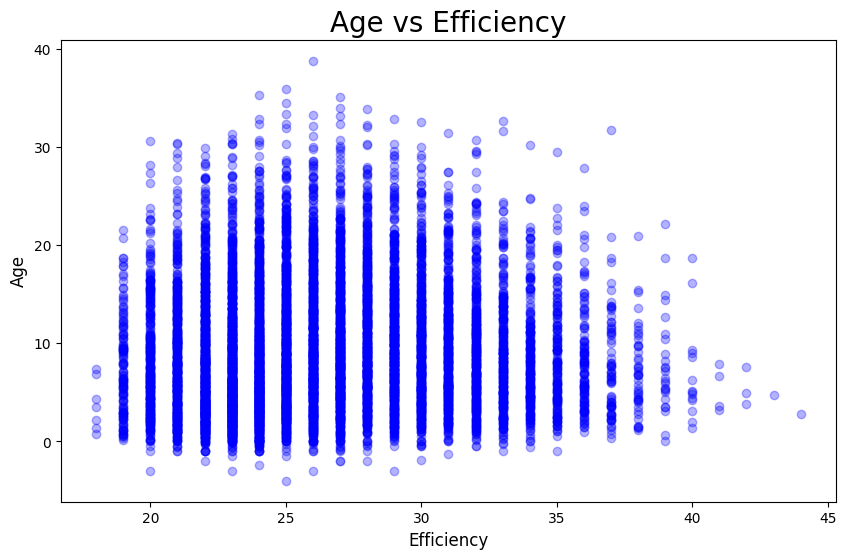

In [36]:
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['Age'], df_clean['Efficiency'], 
           alpha=0.3, color='blue')
plt.title('Age vs Efficiency',fontsize=20)
plt.xlabel('Efficiency',fontsize=12)
plt.ylabel('Age',fontsize=12)

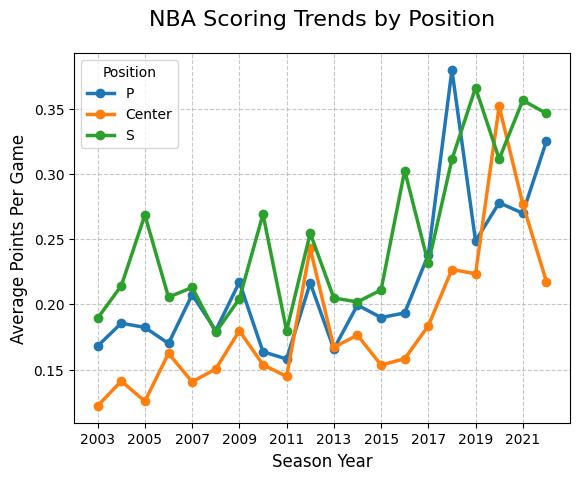

In [28]:
for position in df_clean['Position_Category'].unique():
    pos_data = df_clean[df_clean['Position_Category'] == position]
    yearly_ppg = pos_data.groupby('Year')['PPG'].mean()
    plt.plot(yearly_ppg.index, yearly_ppg.values, 
             label=position, linewidth=2.5, marker='o')
plt.title('NBA Scoring Trends by Position', fontsize=16, pad=20)
plt.xlabel('Season Year', fontsize=12)
plt.ylabel('Average Points Per Game', fontsize=12)
plt.legend(title='Position', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(np.arange(2003, 2023, 2))
plt.xlim(2002, 2023)
plt.show()


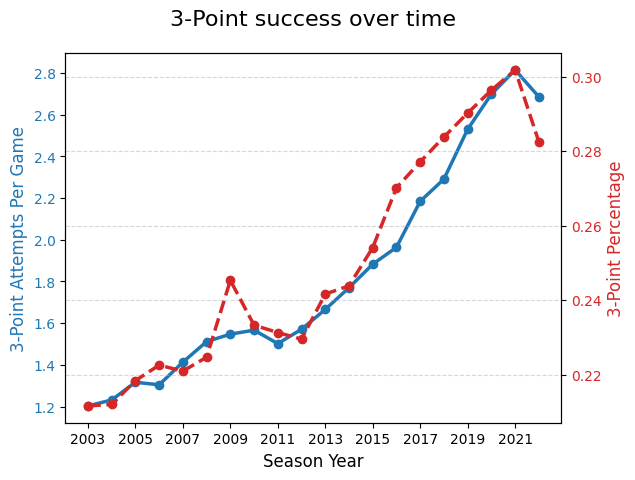

In [29]:
three_pt_evolution = df_clean.groupby('Year').agg({'3PA':'mean', '3P%':'mean'})
fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('Season Year', fontsize=12)
ax1.set_ylabel('3-Point Attempts Per Game', color=color, fontsize=12)
ax1.plot(three_pt_evolution.index, three_pt_evolution['3PA'], 
         color=color, linewidth=2.5, marker='o')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(np.arange(2003, 2023, 2))
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('3-Point Percentage', color=color, fontsize=12)
ax2.plot(three_pt_evolution.index, three_pt_evolution['3P%'], 
         color=color, linewidth=2.5, marker='o', linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)
plt.title('3-Point success over time', fontsize=16, pad=20)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


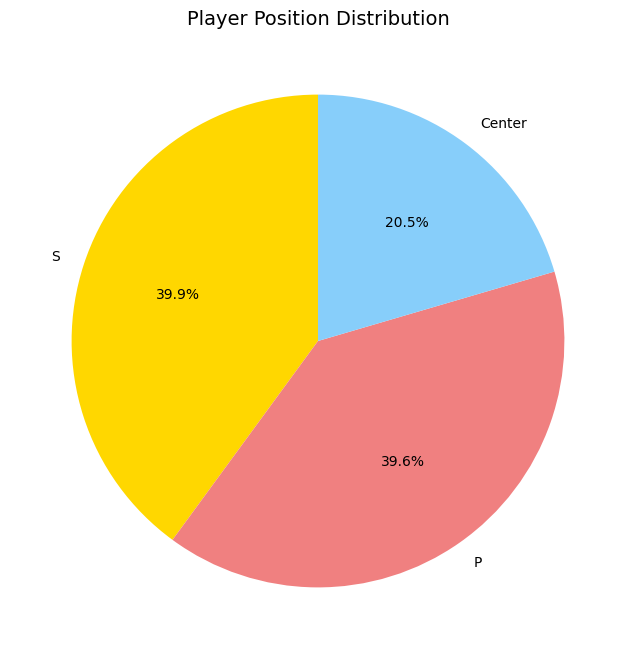

In [31]:
plt.figure(figsize=(8, 8))
position_counts = df_clean['Position_Category'].value_counts()
plt.pie(position_counts, labels=position_counts.index, 
       autopct='%1.1f%%', colors=['gold', 'lightcoral', 'lightskyblue'],
       startangle=90)
plt.title('Player Position Distribution', fontsize=14)
plt.show()